<img src="https://github.com/PKhosravi-CityTech/LightCnnRad/raw/main/Images/BioMindLogo.png" alt="BioMind AI Lab Logo" width="150" height="150" align="left" style="margin-bottom: 40px;"> **Repository Developed by Pegah Khosravi, Principal Investigator of the BioMind AI Lab**

Welcome to this repository! This notebook is designed to provide hands-on experience and foundational knowledge in machine learning. It is part of our journey to explore key ML concepts, algorithms, and applications. Whether you're a PhD student, or a master's student, this repository aims to support your learning goals and encourage critical thinking about machine learning systems.


# **Week 03: Decision Trees and Ensemble Methods**

In this notebook, we will cover:
- Decision Trees: Theory and Implementation
- Random Forests: Ensemble Learning
- Boosting: AdaBoost and XGBoost
- Hands-on exercises with Scikit-learn and XGBoost

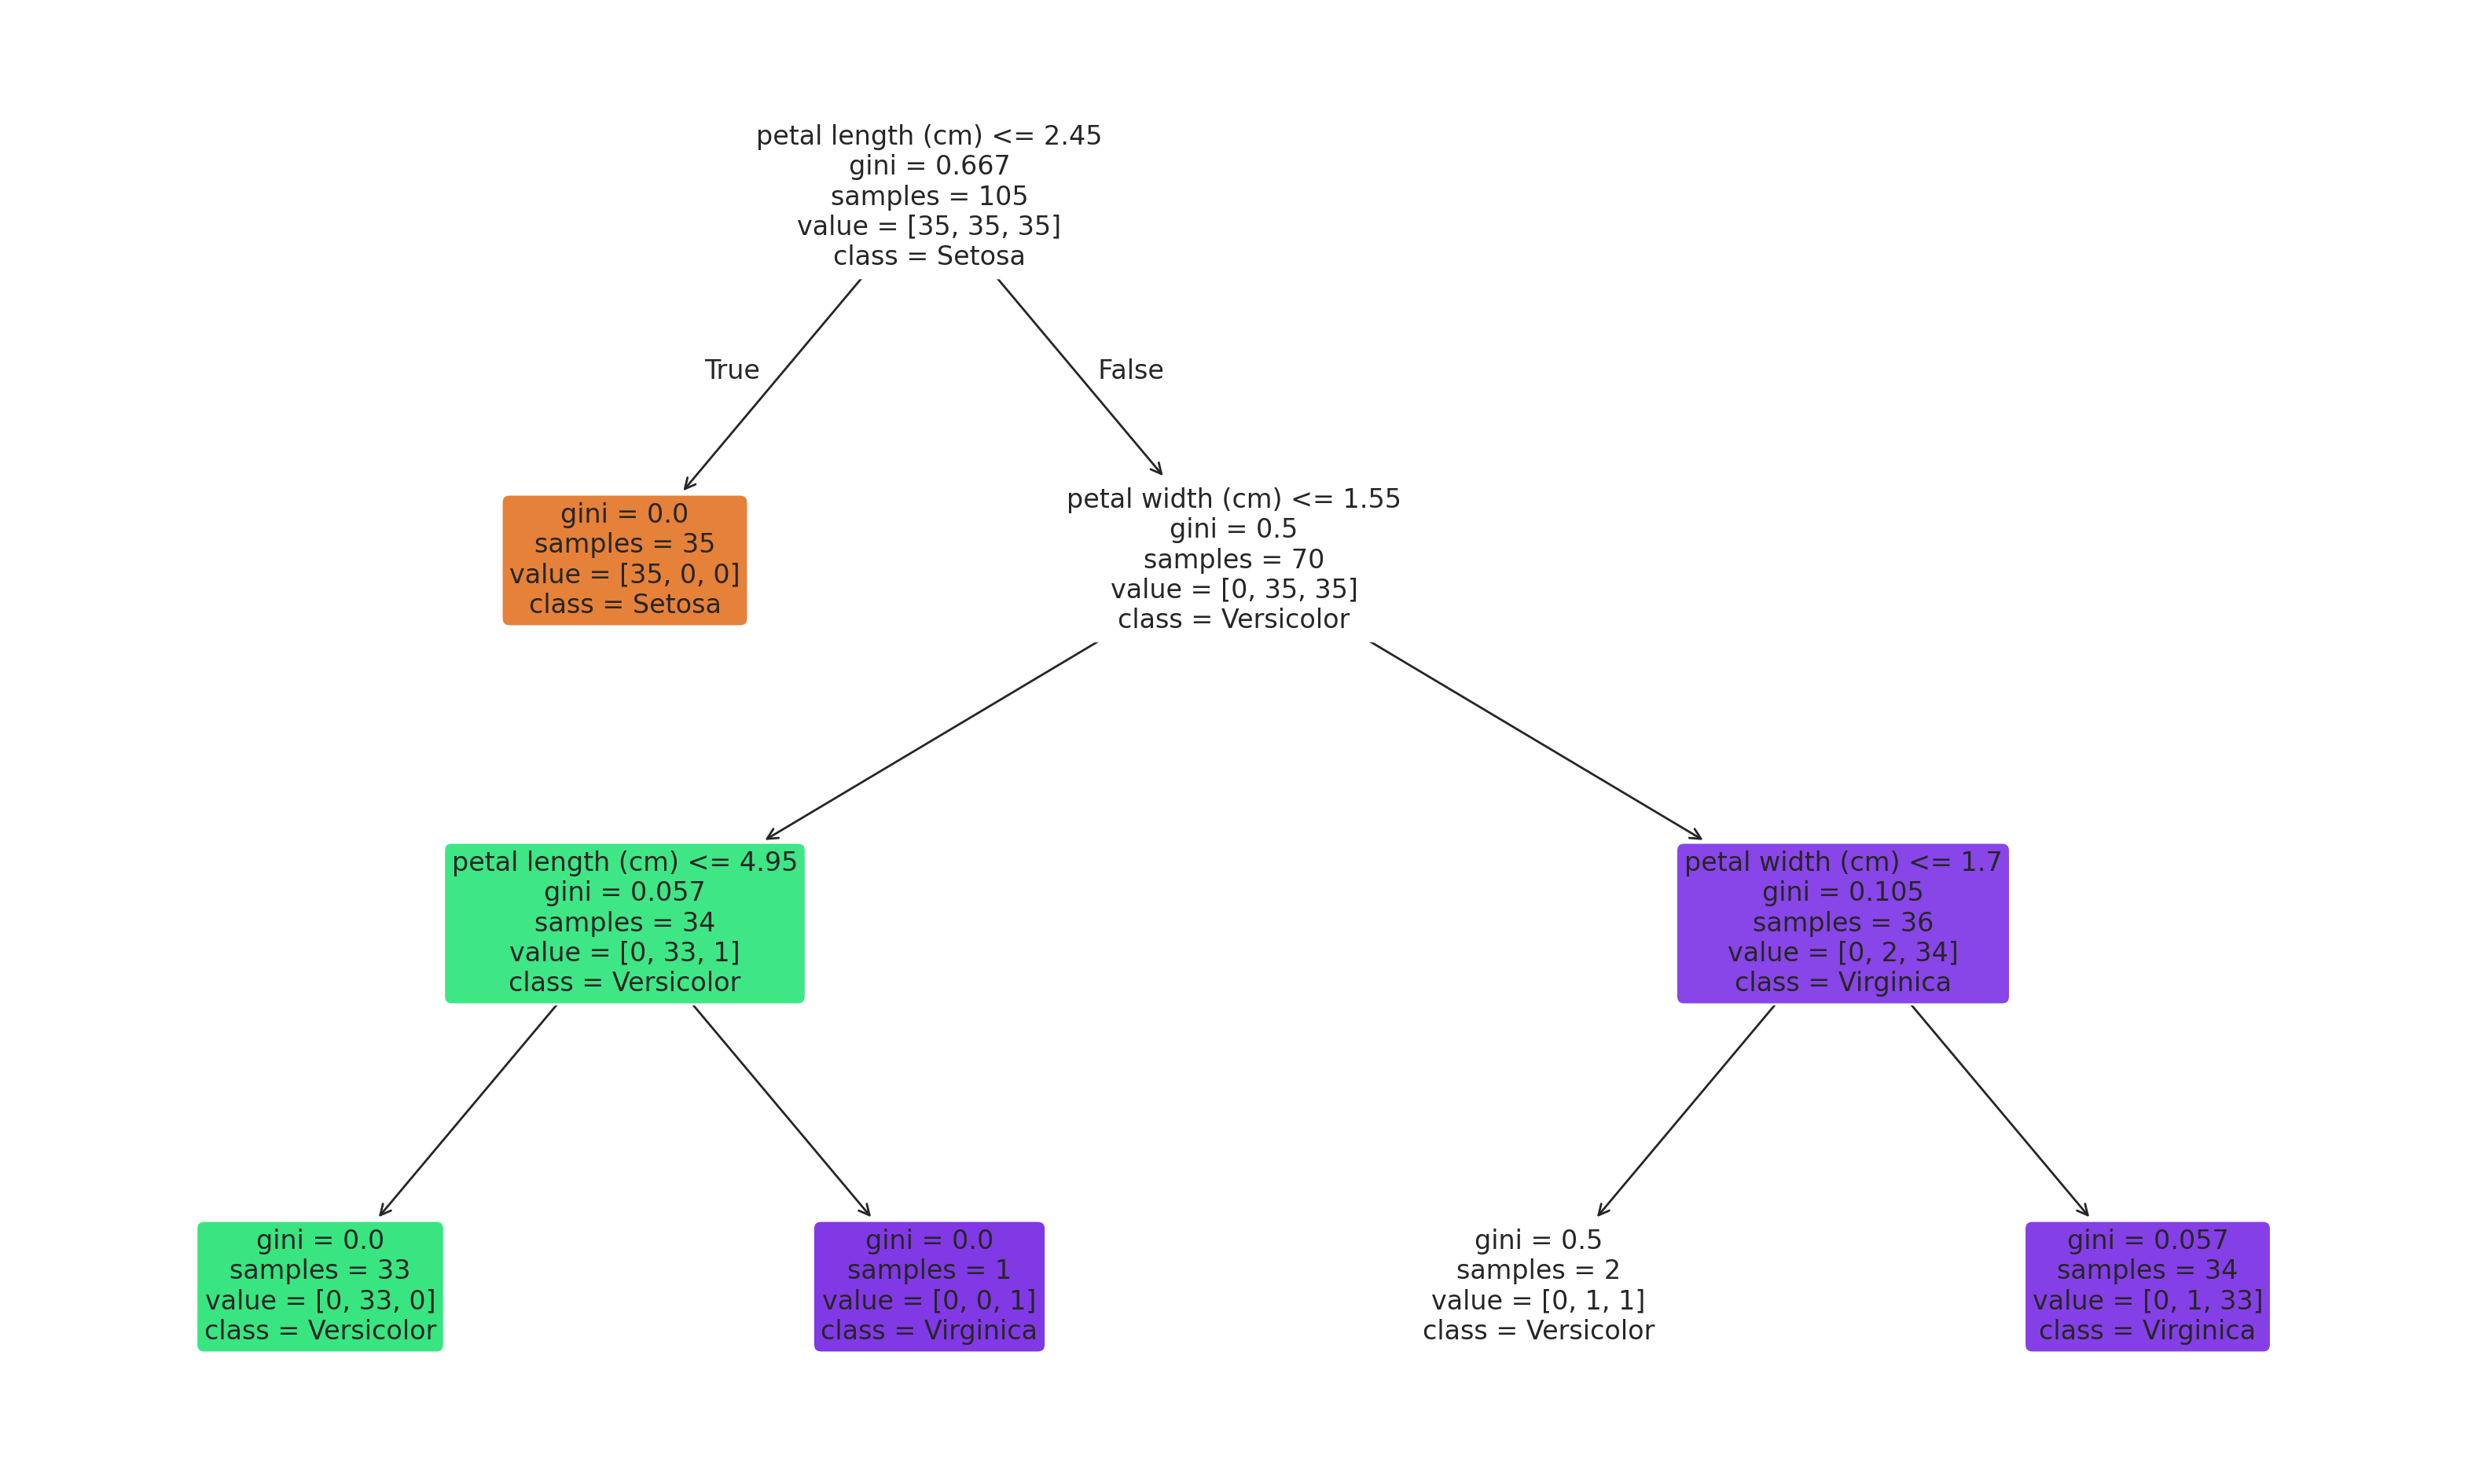

Decision Tree Accuracy: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Random Forest Accuracy: 0.9111111111111111

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

AdaBoost Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-s

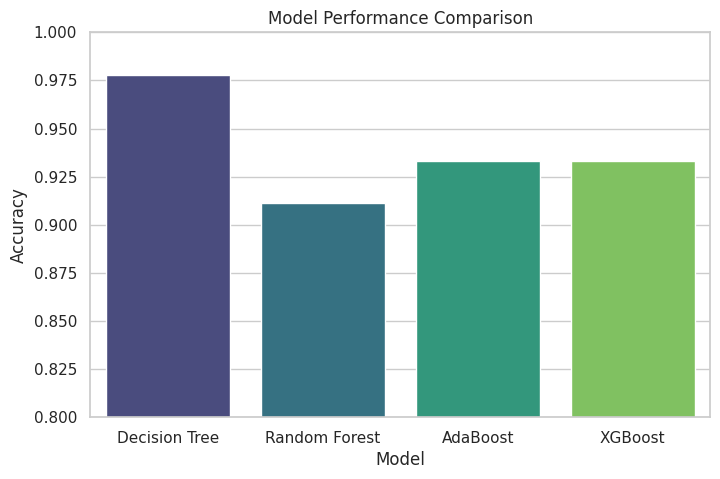

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set visualization style
sns.set(style="whitegrid")

### 2. Load and Prepare Data
# We will use the Iris dataset for classification
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) #stratify=y ensures each class is proportionally represented in both training and testing datasets.

### 3. Decision Tree Classifier
# Initialize and train a Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Visualize the Decision Tree
custom_colors = ListedColormap(["#FF5733", "#33FF57", "#5733FF"])  # Red, Green, Blue

plt.figure(figsize=(20, 12), dpi=200)
plot_tree(dt, feature_names=X.columns, class_names=["Setosa", "Versicolor", "Virginica"],
          filled=True, rounded=True, fontsize=12, impurity=True)
plt.show()


# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

### 4. Random Forest Classifier
# Initialize and train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

### 5. AdaBoost Classifier
# Initialize and train an AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)

# Predictions
y_pred_ada = ada.predict(X_test)

# Evaluation
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))

### 6. XGBoost Classifier
# Initialize and train an XGBoost Classifier
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

### 7. Comparing Models
models = ["Decision Tree", "Random Forest", "AdaBoost", "XGBoost"]
accuracies = [
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_ada),
    accuracy_score(y_test, y_pred_xgb)
]

# Plot Model Accuracies
plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, hue=models, palette="viridis", legend=False)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0.8, 1.0)
plt.show()


Ref: https://scikit-learn.org/stable/modules/tree.html

Ref: https://scikit-learn.org/stable/modules/ensemble.html

## **Interpreting the Decision Tree Diagram**

This **Decision Tree** is trained on the **Iris dataset**, which classifies flowers into three species:
- **Setosa** (🟠 orange)
- **Versicolor** (🟢 green)
- **Virginica** (🟣 purple)

The tree splits data based on **petal length and petal width** to classify flowers.


### **1️⃣ Root Node (First Decision)**
- **Feature Used:** `petal length (cm) <= 2.45`
- **Gini Impurity:** 0.667 (high impurity → all classes are mixed).
- **Samples:** 105 total.
- **Class Distribution:** **35 Setosa, 35 Versicolor, 35 Virginica** (perfectly balanced).
- **Decision:**  
  - If **petal length ≤ 2.45**, go **left** (Setosa).  
  - If **petal length > 2.45**, go **right** (Versicolor or Virginica).  


### **2️⃣ Left Child (Setosa Class)**
- **Gini = 0.0** → **Pure node** (only one class).
- **Samples:** 35
- **Class Distribution:** **[35, 0, 0]** (all Setosa).

✅ **All flowers in this group are classified as Setosa.**


### **3️⃣ Right Child (More Splits Needed)**
- **Feature Used:** `petal width (cm) <= 1.55`
- **Gini = 0.5** → Still mixed (Versicolor & Virginica).
- **Samples:** 70
- **Class Distribution:** **[0, 35, 35]** (only Versicolor & Virginica).
- **Decision:**  
  - If **petal width ≤ 1.55**, go **left** (Versicolor).  
  - If **petal width > 1.55**, go **right** (Virginica).  


### **4️⃣ Left Subtree (Versicolor Path)**
- **Feature Used:** `petal length (cm) <= 4.95`
- **Gini = 0.057** → Almost pure (mostly Versicolor).
- **Samples:** 34
- **Class Distribution:** **[0, 33, 1]** (mainly Versicolor, 1 Virginica).

✅ **Most flowers here are classified as Versicolor.**



### **5️⃣ Right Subtree (Virginica Path)**
- **Feature Used:** `petal width (cm) <= 1.7`
- **Gini = 0.105** → Almost pure (mostly Virginica).
- **Samples:** 36
- **Class Distribution:** **[0, 2, 34]** (mostly Virginica).

✅ **Most flowers here are classified as Virginica.**


### **6️⃣ Leaf Nodes (Final Predictions)**
- **Pure Nodes (Gini = 0.0):**  
  - **[Setosa]** → **Leftmost orange box** (all 35 samples).  
  - **[Versicolor]** → **Green leaf node** (33 samples).  
  - **[Virginica]** → **Purple leaf node** (34 samples).  

- **Mixed Nodes (Gini > 0):**  
  - **[Versicolor with 1 Virginica]** → Still mostly Versicolor.  
  - **[Virginica with 2 Versicolor]** → Still mostly Virginica.  


### **📌 Key Takeaways for Students**
✅ **Gini Impurity** tells us how "mixed" a node is (0 = pure, 1 = completely mixed).  
✅ **Each split is chosen to minimize impurity** and separate the classes better.  
✅ **Deeper nodes are more refined**, but too many splits can lead to **overfitting**.

## Decision Trees: Theory and Implementation

### **1. Introduction to Decision Trees**

A Decision Tree is a supervised learning algorithm used for both classification and regression tasks. It is structured like a tree, where:

- Nodes represent decisions based on feature values.
- Edges represent possible outcomes.
- Leaves represent final predictions (classes or numerical values).

Decision Trees are popular because they are easy to interpret and require little data preprocessing (e.g., no need for feature scaling).

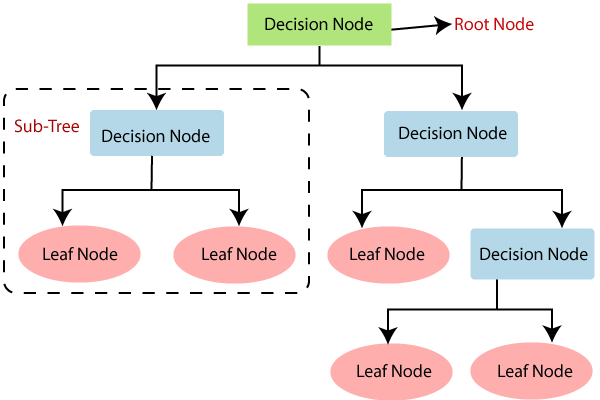

Ref: https://medium.com/@favourphilic/decision-tree-5c1c7b6db59

### **2. How Do Decision Trees Work?**

Decision Trees work by recursively splitting the dataset based on feature values. The goal is to maximize information gain at each step. The tree-building process follows these steps:

🔹 Root Node (First Decision Point)

- The root node is the first decision point in the tree.
- It is determined by selecting the best feature that provides the highest Information Gain (IG) or lowest Gini Impurity.
- This feature creates the first split in the dataset.
- The root node then connects to child nodes, and the process continues recursively.

**Step 1:** Select the Best Feature to Split
1. The algorithm chooses a feature that best separates the data.
2. Common selection criteria:
- Gini Impurity (used in Classification)
- Entropy (Information Gain) (used in Classification)
- Mean Squared Error (MSE) (used in Regression)

**Step 2:** Recursively Split Data
1. The dataset is split into subsets based on the selected feature.
2. The process continues recursively until a stopping condition is met (e.g., max depth is reached, or nodes are pure).

**Step 3:** Make Predictions
- If a new sample reaches a leaf node, the majority class (for classification) or average value (for regression) is used as the prediction.

### **3. Decision Tree Splitting Criteria**

Decision Trees use mathematical criteria to decide where to split. Two common ones for classification:

**A. Gini Impurity**

Measures how "impure" a node is (how often a randomly chosen element would be misclassified if randomly labeled).

Formula:

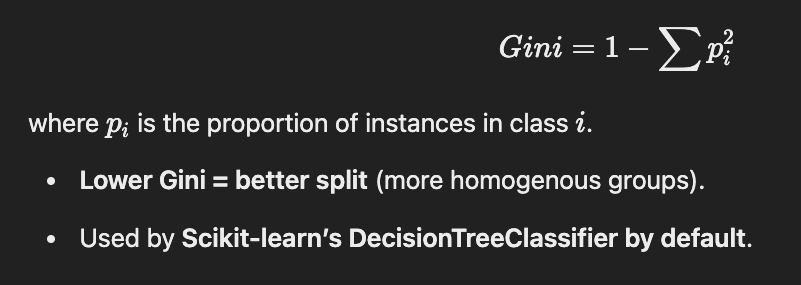

**B. Entropy and Information Gain**

Entropy measures the disorder in a dataset:

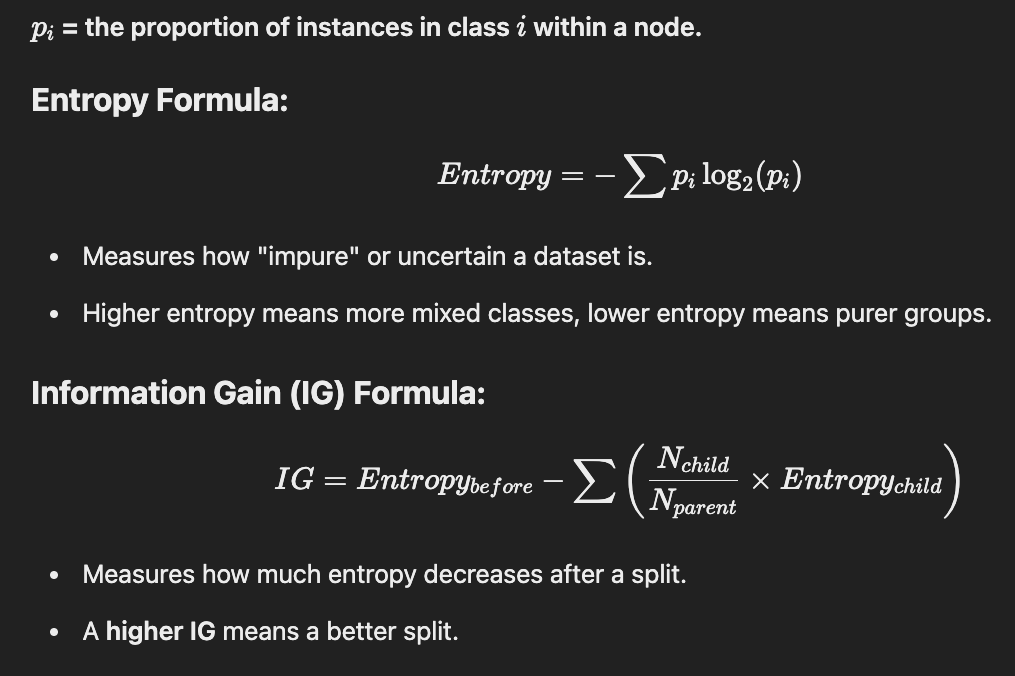

Proportion of Instances in Class \( i \)

The **proportion of instances in class \( i \)** refers to the **relative frequency** of class \( i \) in a dataset. It is calculated as:

\$\$
p_i = \frac{\text{Number of instances in class } i}{\text{Total number of instances}}
\$\$

#### **Example:**
Suppose we have a dataset of **100 students**, where the target variable is **"Passed Exam"** with two classes:

- **Class 1 (Passed):** 60 students  
- **Class 0 (Failed):** 40 students  

The proportion of each class is:

\$\$
p_1 = \frac{60}{100} = 0.6
\$\$
\$\$
p_0 = \frac{40}{100} = 0.4
\$\$

These values p1 = 0.6 and p0 = 0.4 are used in **Gini Impurity** and **Entropy** calculations.

#### **Where is This Used?**
- **In Decision Trees**, proportions help calculate:
  - Gini Impurity

  - Entropy (Information Gain)

For example, using our **Pass/Fail dataset**:

- **Gini Impurity**:
  
  
  $$
  Gini = 1 - (0.6^2 + 0.4^2) = 1 - (0.36 + 0.16) = 0.48
  $$

- **Entropy**:
  
  
  $$
  Entropy = - (0.6 \log_2 0.6 + 0.4 \log_2 0.4)
  $$
  $$
  \approx - (0.6 \times -0.737 + 0.4 \times -1.322) = 0.971
  $$

The higher the **entropy** or **Gini impurity**, the **more mixed** the classes are, meaning a **less pure** node.


🔹 Lower Entropy & Lower Gini = Better split (more pure node).

🔹 Higher Entropy & Higher Gini = Worse split (more mixed classes).


**Goal of Decision Trees**
- Reduce Entropy/Gini at each step (make nodes purer).
- Maximize Information Gain (IG) at each step (best split is the one with highest IG).
- At the end of tree building, IG is maximized and entropy is minimized (resulting in mostly pure leaves).

## Splitting Criteria in Decision Trees

#### **1️⃣ Common Splitting Criteria in Classification Trees**

| **Criterion** | **Description** | **Used In** |
|-------------|--------------------|------------|
| **Gini Impurity** | Measures how "impure" a node is (lower is better). Prefers larger partitions. | Classification |
| **Entropy (Information Gain)** | Measures the uncertainty in a node (higher gain is better). Prefers balanced splits. | Classification |
| **Chi-Square (χ²) Reduction** | Measures statistical significance of splits by testing independence between feature and target. Higher reduction is better. | Categorical Classification |
| **Twoing Criterion** | Splits data into **two balanced groups** by minimizing differences in class distributions. Used in **CART (Classification and Regression Trees)**. | Classification |

#### **2️⃣ Common Splitting Criteria in Regression Trees**

| **Criterion** | **Description** | **Used In** |
|-------------|--------------------|------------|
| **Mean Squared Error (MSE)** | Splits data to minimize variance in numerical values. | Regression |
| **Mean Absolute Error (MAE)** | Similar to MSE but minimizes absolute errors (less sensitive to outliers). | Regression |
| **Poisson Deviance** | Used for **count-based** prediction problems (like predicting number of events). | Regression |
| **Friedman MSE** | A modified version of MSE that adjusts for bias in small trees. | Regression |



Here's a Decision Tree Classifier using a real dataset from the UCI Machine Learning Repository. We'll use the "Banknote Authentication" dataset, which classifies whether a banknote is genuine or forged based on numerical features extracted from images.

**This code:**

- Downloads the dataset from UCI.
- Loads it into a Pandas DataFrame.
- Splits the data into training and testing sets.
- Trains a Decision Tree Classifier.
- Visualizes the Decision Tree.
- Evaluates the model.


## **Banknote Authentication Dataset - UCI Machine Learning Repository**

🔗 **Dataset Link:** [Banknote Authentication Dataset](http://archive.ics.uci.edu/dataset/267/banknote+authentication)

### **Overview:**
The **Banknote Authentication Dataset** is used to **distinguish genuine and forged banknotes** based on numerical features extracted from images of banknotes. These features are obtained using **Wavelet Transform**, which captures statistical properties of the images.

### **Dataset Characteristics:**
- **Number of Instances:** 1,372  
- **Number of Features:** 4 (plus 1 target variable)  

### **Feature Description:**
- **Variance of Wavelet Transformed Image**  
- **Skewness of Wavelet Transformed Image**  
- **Kurtosis of Wavelet Transformed Image**  
- **Entropy of Image**  

### **Target Variable:**
- `0` → Forged Banknote  
- `1` → Genuine Banknote  

### **Use Cases:**
- Fraud detection in banking systems  
- Feature extraction using wavelet transformation  
- Classification models for authentication  


First 5 rows of dataset:
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Using Default Criterion (Gini):


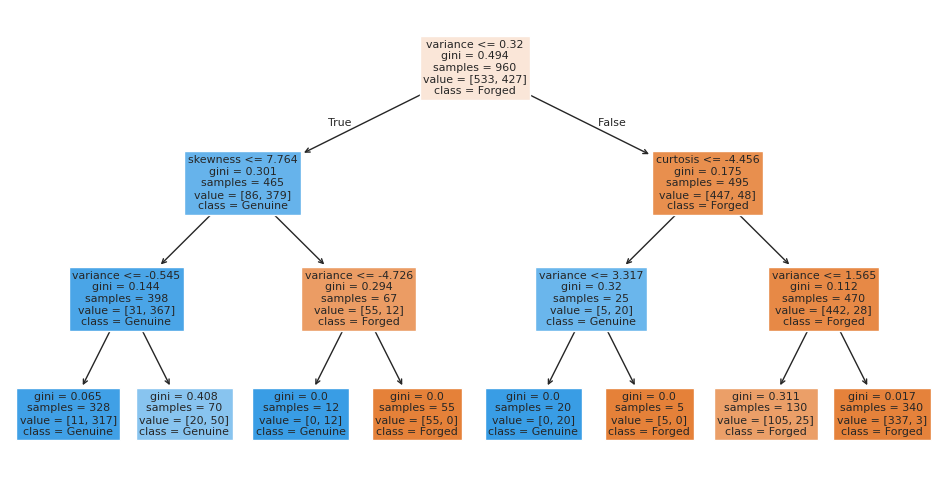

Decision Tree Accuracy: 0.9296

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       229
           1       0.94      0.90      0.92       183

    accuracy                           0.93       412
   macro avg       0.93      0.93      0.93       412
weighted avg       0.93      0.93      0.93       412

Splitting Criterion Used: gini


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import urllib.request

# Download dataset from UCI Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
col_names = ["variance", "skewness", "curtosis", "entropy", "class"]
df = pd.read_csv(url, header=None, names=col_names)

# Display first 5 rows
print("First 5 rows of dataset:")
print(df.head())

# Split features and labels
X = df.drop(columns=["class"])  # Features: variance, skewness, curtosis, entropy
y = df["class"]  # Target: class (0 = forged, 1 = genuine)

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --------------------------- PART 1: DEFAULT (Gini) ---------------------------
print("\nUsing Default Criterion (Gini):")
dt = DecisionTreeClassifier(max_depth=3, random_state=42)  # Default uses "gini"
dt.fit(X_train, y_train)

# Uncomment below to use Entropy instead of Gini
#print("\nUsing Entropy as Criterion:")
#dt = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)  # Uses "entropy"
#dt.fit(X_train, y_train)

# Visualize Decision Tree
plt.figure(figsize=(12,6))
plot_tree(dt, feature_names=X.columns, class_names=["Forged", "Genuine"], filled=True)
plt.show()

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Show the splitting criterion used
print(f"Splitting Criterion Used: {dt.criterion}")  # Confirms whether "gini" or "entropy" is used


## Interpreting the Decision Tree from Root to Leaf

This Decision Tree is built for classifying **Forged vs. Genuine banknotes** based on features such as **variance, skewness, curtosis, and entropy**.

#### **1️⃣ Root Node (First Decision)**
- **Feature Used:** `variance <= 0.32`
- **Gini Impurity:** `0.494` (moderate impurity, meaning both classes are mixed)
- **Samples:** `960` (total dataset)
- **Class Distribution:** `533 Forged, 427 Genuine`
- **Majority Class:** **Forged**
- **Decision:**  
  - If `variance <= 0.32`, follow the **left branch (True)**.
  - If `variance > 0.32`, follow the **right branch (False)**.

#### **2️⃣ First-Level Split (Left & Right)**

##### **Left Child (variance ≤ 0.32 → True Branch)**
- **Feature Used:** `skewness <= 7.764`
- **Gini:** `0.301` (less impurity than root)
- **Samples:** `465`
- **Class Distribution:** `86 Forged, 379 Genuine`
- **Majority Class:** **Genuine**
- **Decision:**  
  - If `skewness ≤ 7.764`, go left.
  - If `skewness > 7.764`, go right.

##### **Right Child (variance > 0.32 → False Branch)**
- **Feature Used:** `curtosis <= -4.456`
- **Gini:** `0.175` (lower impurity, more pure than root)
- **Samples:** `495`
- **Class Distribution:** `447 Forged, 48 Genuine`
- **Majority Class:** **Forged**
- **Decision:**  
  - If `curtosis <= -4.456`, go left.
  - If `curtosis > -4.456`, go right.

#### **3️⃣ Second-Level Splits**

##### **Left Subtree (Genuine Path)**
- **If `skewness <= 7.764`**, we split based on `variance <= -0.545`
  - **Left:** `variance <= -0.545`
    - **Gini:** `0.065` (very pure, mostly genuine)
    - **Samples:** `328`
    - **Class:** **Genuine (317 out of 328)**
  - **Right:** `variance > -0.545`
    - **Gini:** `0.408` (more mixed, but still majority genuine)
    - **Samples:** `70`
    - **Class:** **Genuine (50 out of 70)**

##### **Right Subtree (Forged Path)**
- **If `curtosis > -4.456`**, we split based on `variance <= 1.565`
  - **Left:** `variance <= 1.565`
    - **Gini:** `0.112` (very low impurity, mostly forged)
    - **Samples:** `470`
    - **Class:** **Forged (442 out of 470)**
  - **Right:** `variance > 1.565`
    - **Gini:** `0.017` (extremely pure)
    - **Samples:** `340`
    - **Class:** **Forged (337 out of 340)**

#### **4️⃣ Leaf Nodes (Final Predictions)**
Leaf nodes are the terminal nodes where the **final classification decision** is made. They contain:

- **Gini = 0.0** (Pure nodes)
  - Ex: `variance > -4.726` → **55 samples, all Forged**.
  - Ex: `variance ≤ -4.726` → **12 samples, all Genuine**.
- **Gini close to 0 (high purity)**
  - Ex: `variance > 1.565` → **337 out of 340 Forged**.

Each leaf **represents a final prediction** based on the majority class in that subset.

- Variance: Measures how much data points differ from the mean (spread of data).
- Skewness: Measures the asymmetry of data distribution (left or right skewed).
- Curtosis: Measures how "peaked" a distribution is compared to a normal distribution.
- Entropy: A measure of randomness or disorder in data (higher entropy = more uncertainty).
- Class: The category or label assigned to each data point (e.g., forged or genuine).
- Precision: The percentage of correctly predicted positive cases out of all predicted positives (TP / (TP + FP)).
- Recall: The percentage of actual positive cases correctly predicted (TP / (TP + FN)).
- F1-Score: The harmonic mean of precision and recall, balancing both metrics (2 * (Precision * Recall) / (Precision + Recall)).
- Support: The number of actual occurrences of each class in the dataset.
- Accuracy: The overall percentage of correctly predicted cases ((TP + TN) / Total Samples).
- Macro Avg: The average of precision, recall, and F1-score across all classes, treating each class equally.
- Weighted Avg: The average of precision, recall, and F1-score, weighted by the number of instances in each class.

### **4. Advantages and Disadvantages of Decision Trees**

✅ **Advantages:**

- Easy to interpret (can be visualized).
- Handles both numerical and categorical data.
- No need for feature scaling or normalization.
- Performs well with small to medium-sized datasets.

❌ **Disadvantages:**

- Prone to overfitting (if depth is too high).
- Unstable (small changes in data can result in a different tree).
- Greedy algorithm (locally optimal splits may not be globally optimal).

👉 Solution: Use pruning, max_depth, or ensemble methods (Random Forest, Boosting).



## **Ensemble Learning - Definition & Explanation**  

### **What is Ensemble Learning?**  
✅ **Ensemble Learning** is a **machine learning technique** where **multiple models (weak learners) are combined** to create a **stronger, more accurate model**. The goal is to improve performance, stability, and generalization.

### **Why Use Ensemble Learning?**  
1️⃣ **Reduces Overfitting** → Individual models may overfit, but combining multiple models smooths out errors.  
2️⃣ **Improves Accuracy** → Aggregating predictions from multiple models often leads to higher accuracy than a single model.  
3️⃣ **Handles Bias-Variance Tradeoff** → Some models have high variance (e.g., Decision Trees), others have high bias (e.g., Logistic Regression). Ensembles balance them.  
4️⃣ **Works on Any Model** → Can be used with Decision Trees, Neural Networks, Support Vector Machines, etc.  

### **Types of Ensemble Learning**  

| **Type**         | **Description** | **Common Methods** |
|-----------------|----------------|----------------|
| **Bagging** (Bootstrap Aggregating) | Trains multiple models independently on **random subsets** of the data and averages their predictions. | **Random Forest** |
| **Boosting** | Sequentially trains models, each focusing on correcting the errors of the previous one. | **AdaBoost, Gradient Boosting, XGBoost** |
| **Stacking** | Trains multiple diverse models and then uses a **meta-model** to combine their outputs. | **Stacked Generalization** |


### **Example: Why Ensemble Works?**  
Imagine asking **5 different doctors** to diagnose a patient.  
- If **one doctor makes a mistake**, the combined opinion of **multiple doctors** will likely lead to a **better decision**.  
- Similarly, in **ensemble learning**, combining predictions from multiple models leads to **better accuracy** and **reduces the effect of errors from individual models**.  




## **Bias-Variance Tradeoff: Decision Trees vs. Logistic Regression**

The **bias-variance tradeoff** is a key concept in machine learning that explains the balance between a model being too simple (**high bias**) or too sensitive to training data (**high variance**).

**Decision Trees** tend to have **high variance** because they learn very specific patterns from the training data. Without constraints, a deep Decision Tree will overfit, meaning it captures noise along with the true pattern. As a result, even small changes in the training data can lead to significant changes in the model’s predictions. This makes Decision Trees highly flexible but also unstable across different datasets. To control variance, techniques like **pruning, setting a maximum depth, or using ensemble methods (Random Forest, Boosting)** can help improve generalization.

On the other hand, **Logistic Regression** has **high bias** because it assumes a **linear decision boundary**. This simplicity makes the model interpretable but also limits its ability to capture complex relationships in the data. If the true decision boundary is nonlinear, Logistic Regression may underfit, meaning it fails to learn meaningful patterns. This underfitting issue can be addressed by **adding polynomial features, using kernel methods, or switching to more complex models like Decision Trees or Neural Networks**.

In summary, **Decision Trees overfit (high variance), while Logistic Regression underfits (high bias).** Ensemble methods like **Random Forest** help reduce variance, while more complex transformations can reduce bias. Understanding this tradeoff allows for better model selection depending on the dataset and problem at hand.

## Random Forest: Theory and Implementation

### **1. What is Random Forest?**

Random Forest is an ensemble learning method that builds multiple Decision Trees and combines their outputs to improve performance. It is commonly used for classification and regression problems.

🌳 **How it Works:**

1. Bootstrap Sampling: The dataset is randomly sampled (with replacement) to create multiple training subsets.
2. Train Multiple Decision Trees: Each subset is used to train a separate Decision Tree.
3. Random Feature Selection: Each tree splits on a random subset of features, making trees diverse.
4. Aggregation (Voting/Averaging):
- Classification: Trees vote, and the most frequent class wins (majority voting).
- Regression: The predictions are averaged.

👉 Why is it called "Random" Forest?

- Random Data: Each tree is trained on a random subset of data.
- Random Features: Each tree considers a random subset of features at each split.

**Bootstrap Aggregating (Bagging)** is a technique used in **ensemble learning**, where:
1. **Random Sampling with Replacement**:
   - Multiple subsets of data are created by randomly selecting samples **with replacement** from the original dataset.
   - Some data points may appear **multiple times** in a subset, while others may not appear at all.

2. **Training Multiple Models**:
   - Each subset is used to train a separate **Decision Tree**.
   - Each tree **learns slightly different patterns** because of the randomness.

3. **Aggregation**:
   - For **classification**, each tree votes for the class, and the **majority vote** is taken.
   - For **regression**, the predictions from all trees are **averaged**.

#### **Why Bootstrap Aggregating (Bagging)?**
✅ **Reduces Overfitting** → Individual trees may overfit, but combining multiple trees makes the model more **robust**.  
✅ **Improves Stability** → Small data variations don’t significantly impact the final result.  
✅ **Diverse Trees** → Different training subsets lead to **diverse decision boundaries**, improving generalization.  

#### **Example of Bootstrap Sampling**
Imagine we have a small dataset:  
**Original Data**:  
`A B C D E F G H I J` (10 samples)  

Now, we create 3 bootstrap samples (with replacement):

- **Subset 1** → `A C D D E G I J J`  
- **Subset 2** → `B C C E F H H I J`  
- **Subset 3** → `A B C F G G H I I`  

Each subset is used to train a **different Decision Tree**, and their predictions are **aggregated** in the final model.


**✅ So, Bagging = Bootstrap Sampling + Training Multiple Models + Aggregation**


**2. Implementing Random Forest in Python with UCI Data**

We'll use the "Banknote Authentication" dataset from UCI (same as before) and train a Random Forest Classifier.

First 5 rows of dataset:
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
Random Forest Accuracy: 0.9903

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.99      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



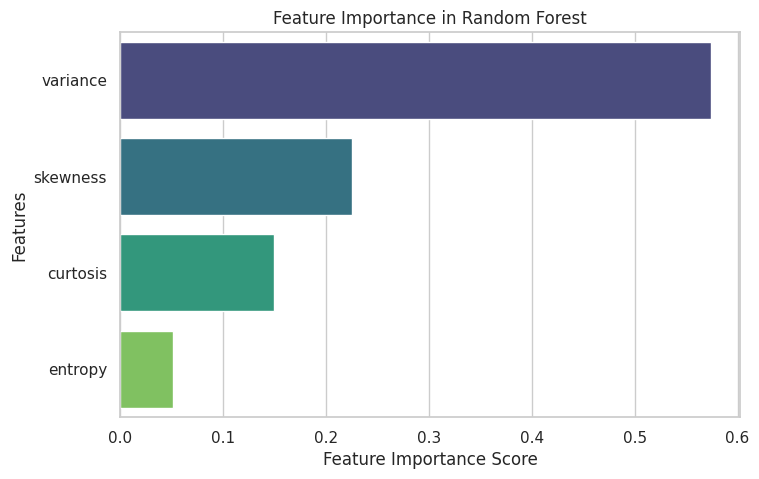

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset from UCI Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
col_names = ["variance", "skewness", "curtosis", "entropy", "class"]
df = pd.read_csv(url, header=None, names=col_names)

# Display first 5 rows
print("First 5 rows of dataset:")
print(df.head())

# Split features and labels
X = df.drop(columns=["class"])  # Features: variance, skewness, curtosis, entropy
y = df["class"]  # Target: class (0 = forged, 1 = genuine)

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot Feature Importance with Fix
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importances, y=feature_importances.index, hue=feature_importances.index, palette="viridis", legend=False)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()


## **Understanding `n_estimators=100` in Random Forest**

In the line:
```python
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
```
✅ **`n_estimators=100`** specifies **the number of decision trees** in the Random Forest.  

### **What Does This Mean?**
- **Random Forest is an ensemble model** → It builds multiple decision trees and combines their predictions.
- **Each tree learns from a different random subset** of the data.
- **More trees = More stability** in predictions, reducing overfitting.

### **How `n_estimators` Affects Performance**
| **`n_estimators` Value** | **Effect on Model** |
|----------------|-------------------------------------|
| **Low (e.g., 10-50)**  | Faster training but less accuracy, model may be unstable. |
| **Moderate (e.g., 100-300)** | Good balance between accuracy and efficiency. |
| **High (e.g., 500-1000)** | Better accuracy but higher computational cost. |


### **Best Practice**
- Start with **`n_estimators=100`** (default).
- **Increase `n_estimators`** if the model **is not performing well** (but beware of longer training time).
- Use **cross-validation** to find the **optimal value**.



**3. Why Use Random Forest?**

✅ Reduces Overfitting – Unlike a single Decision Tree, Random Forest generalizes better.

✅ More Accurate Predictions – Combining multiple trees improves accuracy.

✅ Works with Missing Data – Can handle missing values well.

✅ Handles Large Datasets – Scales well with many features and samples.

✅ Robust to Noise – Less sensitive to outliers compared to a single tree.

🔴 Limitations:

- Slower than a single Decision Tree (because many trees are trained).
- Less Interpretable (hard to visualize many trees).

## Boosting: AdaBoost and XGBoost

**1. What is Boosting?**

Boosting is an ensemble learning technique that combines multiple weak models (usually Decision Trees) to create a stronger model.

Unlike Bagging (Random Forest), which trains independent trees, Boosting trains trees sequentially, where each tree learns from the mistakes of the previous ones.

**Key Idea:**

- Models are trained one after another.
- Each new model focuses more on the previous errors.
- The final prediction is a weighted sum of all models.

**2. Adaptive Boosting (AdaBoost)**

AdaBoost (Adaptive Boosting) is one of the first and simplest boosting algorithms. It improves weak classifiers (usually shallow Decision Trees) by assigning more weight to misclassified samples in each iteration.

**How AdaBoost Works:**
- Train a weak model (e.g., Decision Tree Stump).
- Calculate errors → Misclassified points get higher weights.
- Train next model, focusing on high-weight errors.
- Repeat the process, combining weak learners into a stronger one.

A "Decision Tree Stump" refers to a Decision Tree with only one level (depth = 1). It consists of:

- A single decision node (root).
- Two leaf nodes (final predictions).

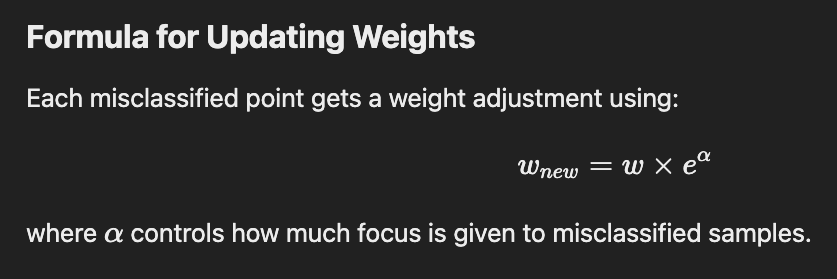

where:

- 𝑤 is the current weight of the sample.
- e refers to Euler’s number (e ≈ 2.718), and the exponent α is related to the importance of misclassified samples
- 𝛼 (sometimes denoted as 𝛼𝑡 or similar) is a factor based on the error of the weak learner.
- Misclassified samples receive a higher weight adjustment, making the next model focus more on them.

**3. Implementing AdaBoost in Python**

We’ll use the Banknote Authentication dataset (same as before).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
col_names = ["variance", "skewness", "curtosis", "entropy", "class"]
df = pd.read_csv(url, header=None, names=col_names)

# Split features and labels
X = df.drop(columns=["class"])
y = df["class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train AdaBoost Classifier
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
ada.fit(X_train, y_train)

# Predictions
y_pred_ada = ada.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))

AdaBoost Accuracy: 0.9976

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      0.99      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



**Key Parameters in AdaBoostClassifier**
- base_estimator → Weak learner (default: Decision Tree Stump).
- n_estimators → Number of weak learners.
- learning_rate → Controls the contribution of each learner.

**What is Learning Rate in AdaBoost?**

The learning rate in AdaBoost controls how much each weak learner (in this case, a DecisionTreeClassifier with max_depth=1, also known as a "decision stump") contributes to the final model. It scales the contribution of each weak learner’s influence in the boosting process.

**How Learning Rate Affects the Model:**

- Higher Learning Rate (e.g., 1.0 or greater) → Each weak learner has a stronger influence, meaning the model learns faster but may risk overfitting.
- Lower Learning Rate (e.g., 0.1 or 0.01) → Each weak learner has less influence, making learning slower but more stable, which can help in avoiding overfitting.


**4. Extreme Gradient Boosting (XGBoost)**

XGBoost (Extreme Gradient Boosting) is an optimized version of boosting that is faster and more efficient.

**Why is XGBoost So Powerful?**

✅ Uses Gradient Boosting → Learns from previous mistakes like AdaBoost but minimizes errors more efficiently.

✅ Handles Missing Values → Built-in handling of missing data.

✅ Regularization (L1 & L2) → Prevents overfitting.

✅ Parallel Processing → Faster than AdaBoost and other boosting methods.

✅ Tree Pruning → Uses depth-wise pruning for optimal performance.

**How XGBoost Works (Gradient Boosting Concept)**

- A weak model is trained.
- Instead of weighting misclassified points (like AdaBoost), errors (residuals) are computed.
- The next model learns to correct the residuals using gradient descent.
- This process is repeated to minimize the error.

In XGBoost, tree pruning refers to removing unnecessary splits in decision trees to improve efficiency and prevent overfitting.

✅ "Depth-wise pruning" means XGBoost grows trees fully up to a max depth, then prunes back unnecessary splits.

✅ Unlike traditional pre-pruning (which stops early), XGBoost first expands trees fully and then removes weak splits.

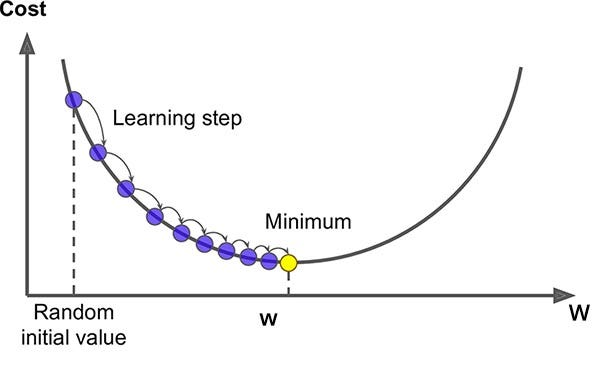

Ref: https://blog.gopenai.com/understanding-of-gradient-descent-intuition-and-implementation-b1f98b3645ea

## **Gradient Descent**  

✅ **Gradient Descent** is an **optimization algorithm** used to **minimize the error** in machine learning models by adjusting model parameters **step by step**. It helps find the **best values** for weights in models like **linear regression, logistic regression, and deep learning**.



### **Why Do We Need Gradient Descent?**  
- Machine learning models **learn by minimizing errors** (cost function).  
- We need to **find the best parameters** (weights, biases) to reduce this error.  
- Gradient Descent **automates this process** by iteratively updating the parameters.  



### **How Does Gradient Descent Work?**  
1️⃣ **Start with Random Parameters**  
   - Initialize the model’s parameters (e.g., weights) randomly.  

2️⃣ **Calculate the Error (Loss Function)**  
   - Measure how far the model's predictions are from the actual values.  
   - Example: In Linear Regression, we use **Mean Squared Error (MSE)**:  
     
   $$ J(w) = \frac{1}{m} \sum (y_i - \hat{y_i})^2 $$  

3️⃣ **Compute the Gradient (Slope of the Error Function)**  
   - The gradient tells us **which direction** to adjust the weights.  
   - If the slope is **positive**, we **decrease** the weight.  
   - If the slope is **negative**, we **increase** the weight.  


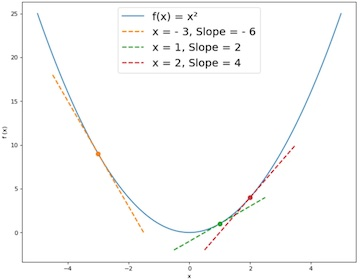

Ref: https://towardsdatascience.com/understanding-the-backpropagation-algorithm-c7a99d43088b/


4️⃣ **Update the Parameters Using the Learning Rate**  
   - Adjust the weights using this formula:  
     
   $$ w = w - \alpha \frac{dJ}{dw} $$  
     
   - $w$ = Weight parameter  

   - $\alpha\$ = Learning rate (controls step size)  

   - $\frac{dJ}{dw}\$ = Gradient (direction of change)  

5️⃣ **Repeat Until Convergence**  
   - Keep updating weights **until the error stops decreasing** (reaches minimum).  



### **Types of Gradient Descent**  

| **Type**                | **Description** | **Pros** | **Cons** |
|------------------------|----------------|----------|----------|
| **Batch Gradient Descent** | Uses the **entire dataset** to compute the gradient. | Stable convergence | Slow for large datasets |
| **Stochastic Gradient Descent (SGD)** | Uses **one data point at a time** for updates. | Faster updates | Noisy updates, may overshoot |
| **Mini-Batch Gradient Descent** | Uses **a small batch of data** for each update. | Balance between speed & stability | Still has some noise |

---

### **Key Takeaways**  
- Gradient Descent **adjusts parameters iteratively** to minimize error.  
- The **learning rate ( $\alpha \$) is crucial** → Too large = Overshoot, Too small = Slow learning.  
- **Different types of gradient descent exist** (Batch, SGD, Mini-Batch).  
- It is widely used in **regression, neural networks, and deep learning**.  


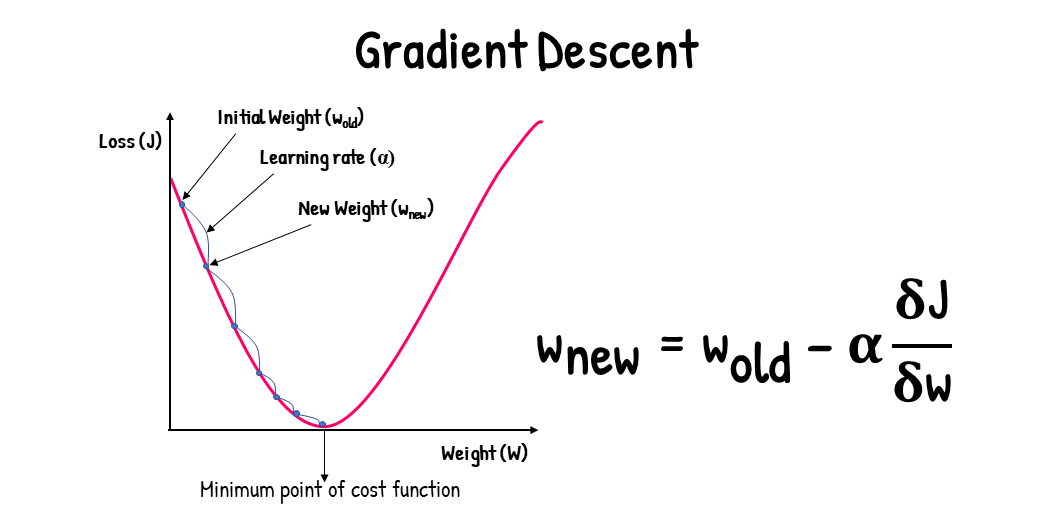

Ref: https://www.linkedin.com/pulse/understanding-gradient-descent-algorithm-its-role-linear-mhango-kjbvf/

**5. Implementing XGBoost in Python**

In [ ]:
import xgboost as xgb

# Train XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    eval_metric="logloss",
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9976

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      0.99      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



**Key Parameters in XGBClassifier**

- n_estimators → Number of trees.
- learning_rate → Step size for updating models.
- max_depth → Limits tree depth to prevent overfitting.
- eval_metric → Metric used to evaluate performance.

## **Log Loss (Logarithmic Loss)**

Log Loss (Logarithmic Loss) is a performance metric used to evaluate classification models based on their predicted probabilities. It measures how close the predicted probability distribution is to the actual class labels.



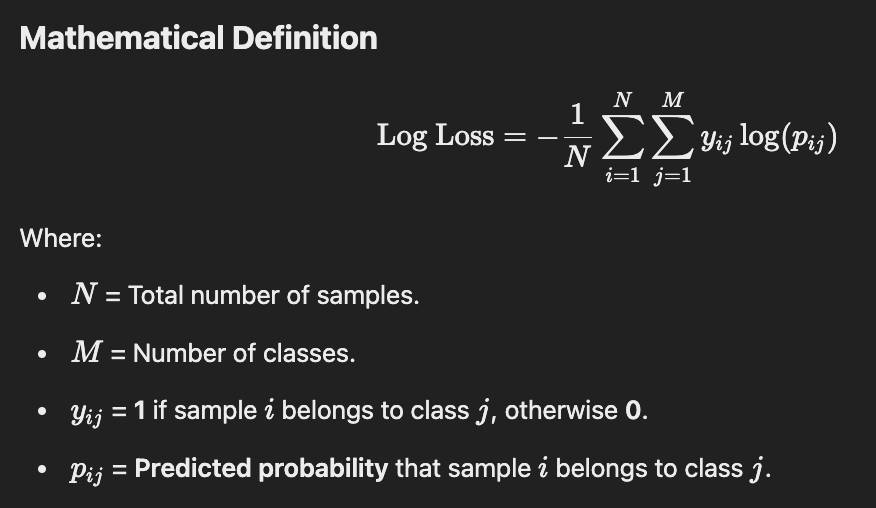

### Intuition Behind Log Loss

- If the predicted probability is high (close to 1) for the correct class, the log loss is low (good prediction).
- If the predicted probability is low (close to 0) for the correct class, the log loss is high (bad prediction).
- Log Loss penalizes incorrect confident predictions more than small mistakes.

#### **Log Loss in Different Scenarios**

| **True Class** | **Predicted Probability** | **Log Loss Contribution** |
|--------------|--------------------------|--------------------------|
| 1 | 0.95 | **-log(0.95) ≈ 0.051 (Good)** |
| 1 | 0.50 | **-log(0.50) ≈ 0.693 (Uncertain)** |
| 1 | 0.05 | **-log(0.05) ≈ 2.996 (Bad)** |


### Comparing AdaBoost vs. XGBoost

| Feature  | AdaBoost | XGBoost |
|----------|---------|---------|
| **Algorithm** | Focuses on misclassified samples | Uses gradient boosting (residual correction) |
| **Speed** | Slower | Faster (optimized computations) |
| **Overfitting Control** | Less control | Regularization (L1, L2) prevents overfitting |
| **Parallel Processing** | No | Yes (multi-threaded training) |
| **Handling Missing Values** | No | Yes (built-in) |
| **Best for** | Simple datasets | Large, complex datasets |

** When to Use AdaBoost vs. XGBoost?**

✅ Use AdaBoost when:

- You have small datasets with low noise.
- You need a simple boosting approach with Decision Trees.

✅ Use XGBoost when:

- You have large, complex datasets.
- You need high accuracy & efficiency (e.g., Kaggle competitions).
- Your dataset has missing values.

**Regularization (L1 & L2)**

- Regularization is a technique used to prevent overfitting by adding a penalty to the model’s complexity. It discourages the model from relying too much on any particular feature.

1️⃣ L1 Regularization (Lasso Regression)

- Adds a penalty equal to the absolute values of the coefficients (|w|).
- Can shrink some coefficients to exactly 0, effectively removing irrelevant features.
- Helps in feature selection (useful in high-dimensional datasets).

✅ Used in:

- Lasso Regression (Linear Models).
- Feature Selection (drops unnecessary features).


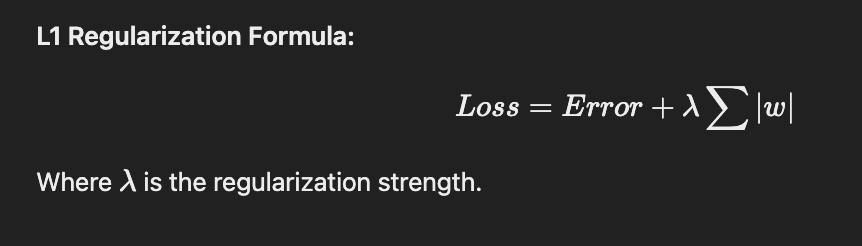

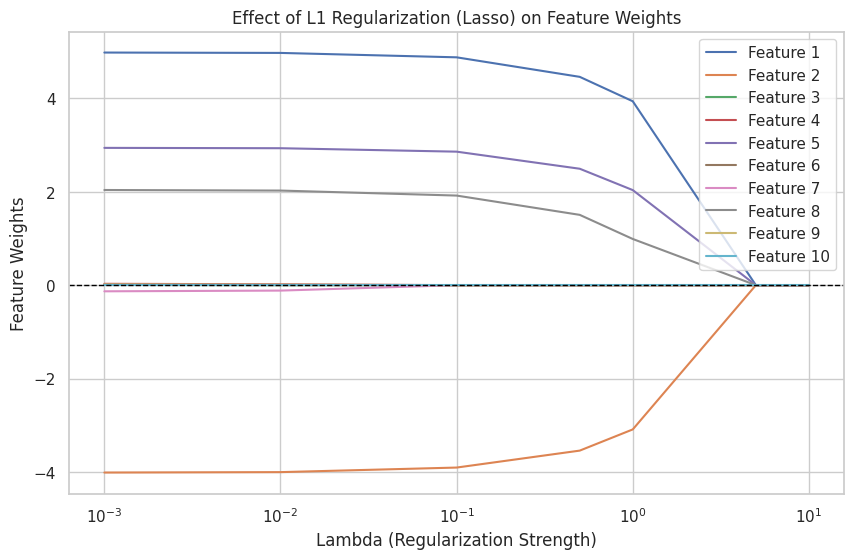

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# Generate synthetic dataset with 10 features
np.random.seed(42)
X = np.random.randn(100, 10)  # 100 samples, 10 features
true_weights = np.array([5, -4, 0, 0, 3, 0, 0, 2, 0, 0])  # Some features are truly 0
y = X @ true_weights + np.random.randn(100) * 0.5  # Add some noise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Try different values of lambda (alpha in sklearn) - avoiding alpha=0
lambdas = [0.001, 0.01, 0.1, 0.5, 1, 5, 10]  # Start from very small instead of 0
weights = []

for l in lambdas:
    lasso = Lasso(alpha=l, max_iter=5000)  # Increased max_iter for stability
    lasso.fit(X_train, y_train)
    weights.append(lasso.coef_)

weights = np.array(weights)

# Plot feature weight shrinkage
plt.figure(figsize=(10,6))
for i in range(X.shape[1]):  # Loop through each feature
    plt.plot(lambdas, weights[:, i], label=f'Feature {i+1}')

plt.xscale('log')  # Log scale for better visualization
plt.xlabel("Lambda (Regularization Strength)")
plt.ylabel("Feature Weights")
plt.title("Effect of L1 Regularization (Lasso) on Feature Weights")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.show()


2️⃣ L2 Regularization (Ridge Regression)

- Adds a penalty equal to the squared values of the coefficients (w²).
- Shrinks all coefficients closer to 0 but doesn’t eliminate them completely.
- Helps in reducing overfitting by making weights smaller.

✅ Used in:

- Ridge Regression (Linear Models).
- XGBoost and Random Forest (controlling model complexity).

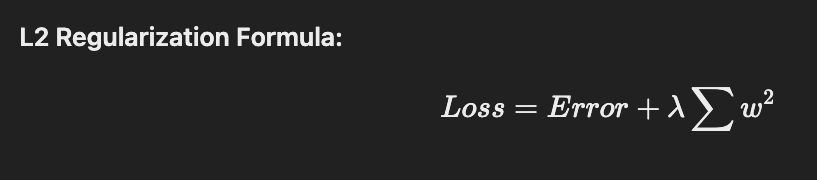

**𝑤 represents the coefficient (or weight) of a feature in a model.**

How Regularization Affects 𝑤:
- L1 (Lasso) forces some 𝑤 to become exactly 0 (feature elimination).
- L2 (Ridge) shrinks 𝑤 values but keeps them small, not zero.

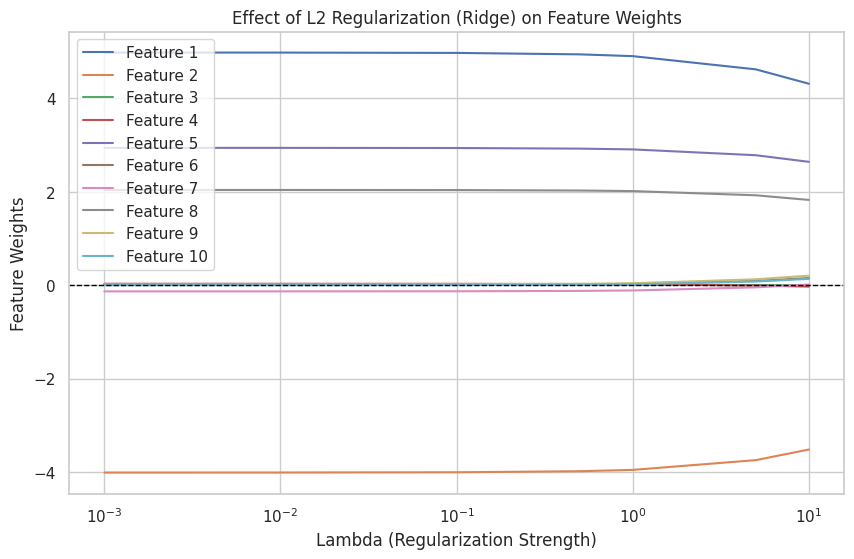

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Generate synthetic dataset with 10 features
np.random.seed(42)
X = np.random.randn(100, 10)  # 100 samples, 10 features
true_weights = np.array([5, -4, 0, 0, 3, 0, 0, 2, 0, 0])  # Some features are truly 0
y = X @ true_weights + np.random.randn(100) * 0.5  # Add some noise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Try different values of lambda (alpha in sklearn) - avoiding alpha=0
lambdas = [0.001, 0.01, 0.1, 0.5, 1, 5, 10]  # Start from very small instead of 0
weights = []

for l in lambdas:
    ridge = Ridge(alpha=l, max_iter=5000)  # Increased max_iter for stability
    ridge.fit(X_train, y_train)
    weights.append(ridge.coef_)

weights = np.array(weights)

# Plot feature weight shrinkage
plt.figure(figsize=(10,6))
for i in range(X.shape[1]):  # Loop through each feature
    plt.plot(lambdas, weights[:, i], label=f'Feature {i+1}')

plt.xscale('log')  # Log scale for better visualization
plt.xlabel("Lambda (Regularization Strength)")
plt.ylabel("Feature Weights")
plt.title("Effect of L2 Regularization (Ridge) on Feature Weights")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.show()


 ### L1 vs. L2 Regularization – Key Differences

| Feature | L1 Regularization (Lasso) | L2 Regularization (Ridge) |
|---------|-----------------|----------------|
| **Effect on Weights** | Some weights become **exactly 0** | Weights get smaller, but never 0 |
| **Feature Selection?** | ✅ Yes (eliminates features) | ❌ No (keeps all features) |
| **Best for** | Sparse datasets, high-dimensional data | Preventing overfitting in general |
| **Computation** | Slower (absolute values) | Faster (squared values) |


## **Gradient Updates for L1 and L2 Regularization**

### **🔹 L1 Regularization (Lasso) Gradient Update**

The gradient update for L1 regularization modifies the weight update equation as follows:

$$
 w = w - \alpha \left( \frac{dJ}{dw} + \lambda \cdot \text{sign}(w) \right)
$$

where:
- **$ \lambda \cdot \text{sign}(w) $** applies a constant shrinkage force.
- **$ \text{sign}(w) $** returns:
  - $ +1 $ if $ w > 0 $ (decreasing weight)
  - $ -1 $ if $ w < 0 $ (increasing weight)
  - $ 0 $ if $ w = 0 $ (weight remains zero)

✅ **Key Effect:** This update forces some weights to **exactly 0**, leading to feature elimination.



### **🔹 L2 Regularization (Ridge) Gradient Update**

The gradient update for L2 regularization modifies the weight update equation as follows:

$$
 w = w - \alpha \left( \frac{dJ}{dw} + 2\lambda w \right)
$$

where:
- **$ 2\lambda w $** applies a proportional shrinkage force.
- The penalty **reduces large weights more aggressively**, but **never forces any weight to exactly 0**.

✅ **Key Effect:** L2 shrinks all weights but **does not eliminate any features**.



### **🔹 Summary of the Difference**
| Regularization | Gradient Update Formula | Effect on Weights |
|--------------|----------------------|----------------|
| **L1 (Lasso)** | $$ w = w - \alpha \left( \frac{dJ}{dw} + \lambda \cdot \text{sign}(w) \right) $$ | Some weights become **exactly 0** (Feature Selection) |
| **L2 (Ridge)** | $$ w = w - \alpha \left( \frac{dJ}{dw} + 2\lambda w \right) $$ | Weights shrink but **never reach 0** |



## **When to Use L1 (Lasso) vs. L2 (Ridge) Regularization?**

Both **L1 (Lasso) and L2 (Ridge)** help prevent overfitting, but they are used in **different scenarios** based on the dataset characteristics and the problem at hand.


### **🔹 When to Use L1 (Lasso)?**  
**Use L1 regularization when you need:**  
✔ **Feature Selection** – L1 forces some weights to exactly **zero**, removing irrelevant features automatically.  
✔ **High-Dimensional Data** – If you have **many features (e.g., thousands), but only a few are important**, L1 helps select the best ones.  
✔ **Sparse Datasets** – If most features have **zero or near-zero impact**, L1 helps ignore them.  

📌 **Example Use Case – Predicting House Prices**  
Imagine you have **1000 different features** (e.g., number of bedrooms, lot size, distance to a school, etc.), but only **a few truly matter**.  
🔹 **L1 (Lasso) will remove less important features**, keeping only the strongest predictors (e.g., number of bedrooms and square footage).  

```python
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)  # L1 regularization
lasso.fit(X_train, y_train)
print("Selected Features:", np.sum(lasso.coef_ != 0))  # Count of non-zero weights
```


### **🔹 When to Use L2 (Ridge)?**  
**Use L2 regularization when you need:**  
✔ **To Keep All Features** – L2 shrinks weights but **never eliminates features completely**.  
✔ **Correlated Features** – If features are correlated, L2 **distributes importance** across them instead of removing some.  
✔ **Small or Medium-Sized Datasets** – L2 helps when you have **limited data and need to keep all features**.  

📌 **Example Use Case – Predicting Sales Revenue**  
You have **sales data from different regions**, and all regions contribute somewhat to revenue.  
🔹 **L2 (Ridge) will keep all regions in the model but reduce the impact of less important ones.**  

```python
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  # L2 regularization
ridge.fit(X_train, y_train)
print("Feature Weights:", ridge.coef_)  # Weights shrink but never reach 0
```


### **🔹 When to Use Both (Elastic Net)?**  
If you **want both feature selection (L1) and weight shrinkage (L2),** use **Elastic Net**, which combines both techniques.  

```python
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # 50% L1, 50% L2
elastic_net.fit(X_train, y_train)
```


### **When to Use L1 vs. L2**  
| **Scenario** | **Use L1 (Lasso)** | **Use L2 (Ridge)** |
|-------------|-------------------|-------------------|
| **Feature Selection Needed?** | ✅ Yes | ❌ No |
| **Keep All Features?** | ❌ No | ✅ Yes |
| **High-Dimensional Data?** | ✅ Best Choice | ❌ Less Effective |
| **Correlated Features?** | ❌ Not Ideal | ✅ Best Choice |
| **Works with Small Data?** | ❌ Less Stable | ✅ More Stable |

---


## **Elastic Net - Short Explanation**

### **🔹 What is Elastic Net?**  
Elastic Net is a **regularization technique** that combines **L1 (Lasso) and L2 (Ridge) regularization** in a linear model.

✔ **L1 (Lasso)** helps with **feature selection** by forcing some weights to **exactly 0**.  
✔ **L2 (Ridge)** helps with **stability** by shrinking all weights but never making them zero.  
✔ **Elastic Net** balances both effects, making it useful when **features are correlated**.


### **🔹 Formula:**  
$$
J(w) = \text{Loss} + \lambda_1 \sum |w| + \lambda_2 \sum w^2
$$


### **🔹 When to Use Elastic Net?**  
- If **Lasso alone struggles** due to highly correlated features.  
- If you want both **feature selection (L1) and weight shrinkage (L2)**.  


### **🔹 Example in Python:**  
```python
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # 50% L1, 50% L2
elastic_net.fit(X_train, y_train)
print("Feature Weights:", elastic_net.coef_)  # Some weights may be exactly 0
```


## **Sparse vs. Non-Sparse Data**

### **🔹 Sparse Data**
- A dataset is **sparse** when most of its values are **zero or missing**.
- Example: A medical image where **only a few pixels contain relevant information**, and the rest are black or empty (e.g., fMRI, CT scans).
- Sparse data is often **compressed or requires special algorithms** to process efficiently.

### **🔹 Non-Sparse (Dense) Data**
- A dataset is **non-sparse (dense)** when most values contain meaningful information.
- Example: A **PET scan**, where **every pixel or voxel has metabolic activity values** (no large empty regions).
- Dense data can be processed using **standard machine learning models** without special modifications.


### **Regression vs. Correlation**

| Feature       | Regression | Correlation |
|--------------|------------|------------|
| **Definition** | A technique to predict the value of a dependent variable (Y) based on independent variable(s) (X). | A measure of the strength and direction of the relationship between two variables. |
| **Purpose** | Determines how X influences Y and finds a best-fit equation (Y = f(X)). | Measures association between two variables without implying causation. |
| **Causation?** | Yes, regression assumes a causal relationship (X affects Y). | No, correlation does not imply causation. |
| **Output** | A model/equation for prediction (e.g., \( Y = mX + b \) in linear regression). | A single correlation coefficient (r) between -1 and +1. |
| **Types** | Linear Regression, Logistic Regression, Polynomial Regression, etc. | Pearson’s Correlation, Spearman’s Correlation, Kendall’s Tau. |
| **Example Use Case** | Predicting house prices based on square footage. | Checking if higher temperatures are related to higher ice cream sales. |


## **Assignment: Predicting Heart Disease Using Machine Learning**

### **Objective**
In this assignment, you will apply machine learning techniques to **predict heart disease** using the **UCI Heart Disease Dataset**. You will follow **seven steps** to load, preprocess, train, evaluate, and compare multiple classification models.

---

### **📝 Instructions**
**Dataset:** The dataset is available at the following UCI Machine Learning Repository link:  
🔗 [Heart Disease Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data)

### **Steps to Complete the Assignment**

#### **1️⃣ Load and Explore the Dataset**  
- Load the dataset from the UCI link.
- Assign appropriate column names based on the dataset documentation.
- Display the first few rows of the dataset to understand its structure.

#### **2️⃣ Handle Missing Values and Preprocess Data**  
- Check for missing values in the dataset.
- If there are missing values, decide whether to drop or impute them.
- Convert categorical features if necessary.
- Binarize the target variable (`target`):  
  - **0** → No heart disease  
  - **1** → Presence of heart disease (combine values > 0 into 1).  

#### **3️⃣ Split the Data into Training and Testing Sets**  
- Use **`train_test_split`** to divide the dataset (**70% training, 30% testing**).
- Use **stratification** to ensure class balance in both sets.

#### **4️⃣ Train a Decision Tree Classifier**  
- Initialize and train a **Decision Tree Classifier** with `max_depth=3`.
- Visualize the Decision Tree using **`plot_tree()`**.
- Make predictions and evaluate the model using:
  - **Accuracy Score**
  - **Classification Report (Precision, Recall, F1-Score)**

#### **5️⃣ Train and Evaluate Other Models**  
Train and evaluate the following models using the same dataset:
- **Random Forest Classifier** (`n_estimators=100, max_depth=3`)
- **AdaBoost Classifier** (`n_estimators=50`)
- **XGBoost Classifier** (`eval_metric='logloss'`)
- Compare their accuracy, precision, recall, and F1-score.

#### **6️⃣ Compare Model Performance**  
- Store accuracy scores of all models.
- Plot a **bar chart** comparing their accuracy.

#### **7️⃣ Interpret the Results**  
- **Which model performed the best?**  
- **Why do you think that model outperformed the others?**  
- **Discuss the trade-offs between models** (e.g., accuracy vs. recall).  
- **What improvements could be made to enhance model performance?**  

---

### **🔍 Expected Output**
✅ A **cleaned and preprocessed dataset** ready for modeling.  
✅ A **Decision Tree visualization** showing feature splits.  
✅ Model performance metrics (**accuracy, precision, recall, F1-score**).  
✅ A **bar chart** comparing accuracy across models.  
✅ A **short written conclusion** discussing model performance.

---

### **🎯 Submission Requirements**
- Submit a **Jupyter Notebook** or **Colab Notebook** with all **code and explanations**.
- Include a **summary of findings** based on model performance.
- **Bonus:** Try optimizing hyperparameters for better results.

---

### **🚀 Ready to Predict Heart Disease?**
💡 **Hint:** Use the sample code from class as a reference. If you're stuck, check the **Scikit-learn documentation** for help! 😊📊


First 5 rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


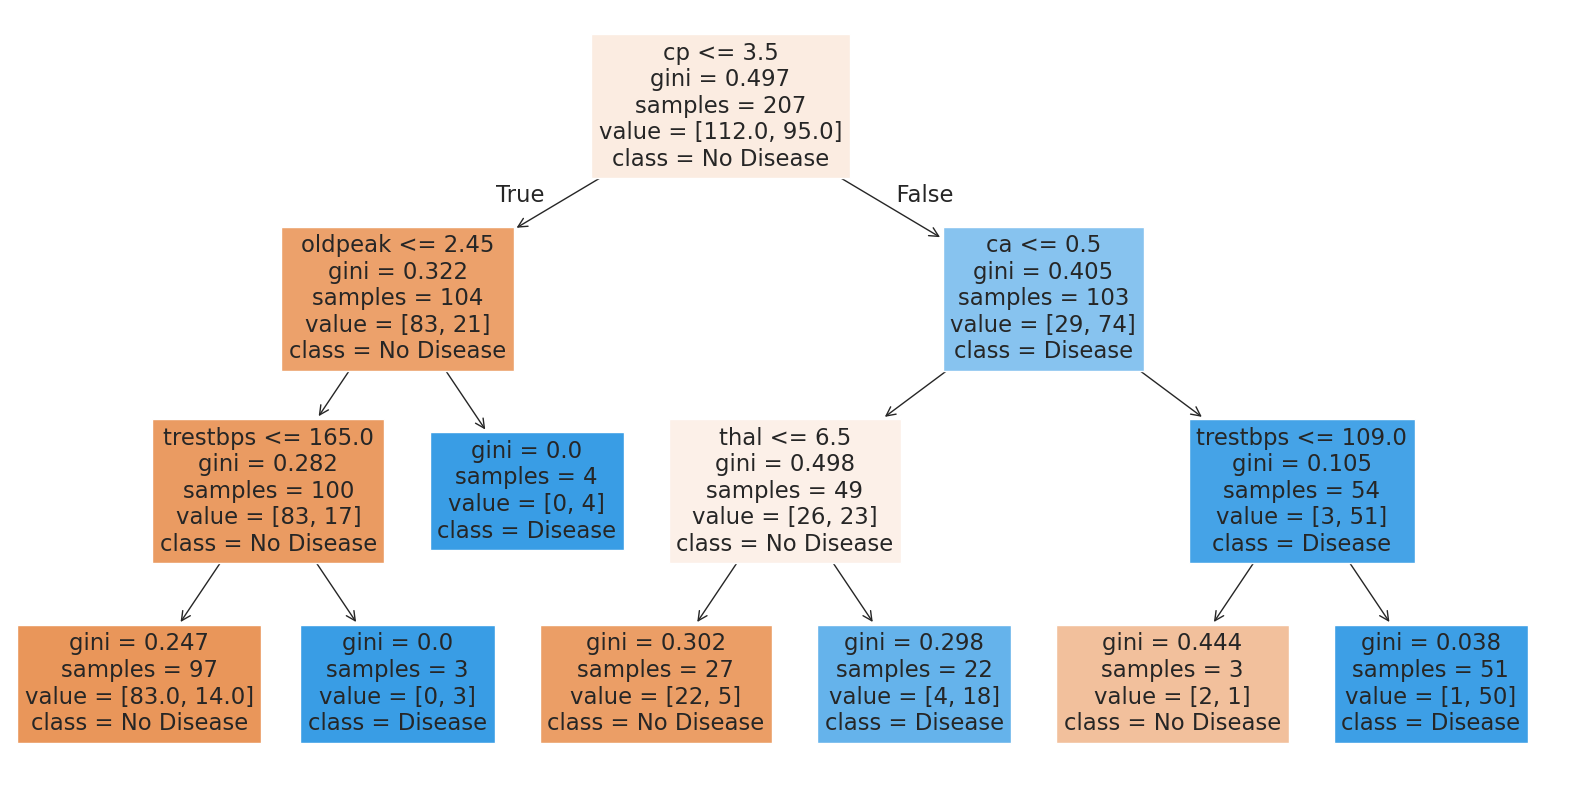

Decision Tree Accuracy: 0.7333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77        48
           1       0.76      0.62      0.68        42

    accuracy                           0.73        90
   macro avg       0.74      0.73      0.73        90
weighted avg       0.74      0.73      0.73        90

Random Forest Accuracy: 0.8555555555555555

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.87        48
           1       0.91      0.76      0.83        42

    accuracy                           0.86        90
   macro avg       0.87      0.85      0.85        90
weighted avg       0.86      0.86      0.85        90

AdaBoost Accuracy: 0.8222222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.84        48
           1       0.86      0.74     

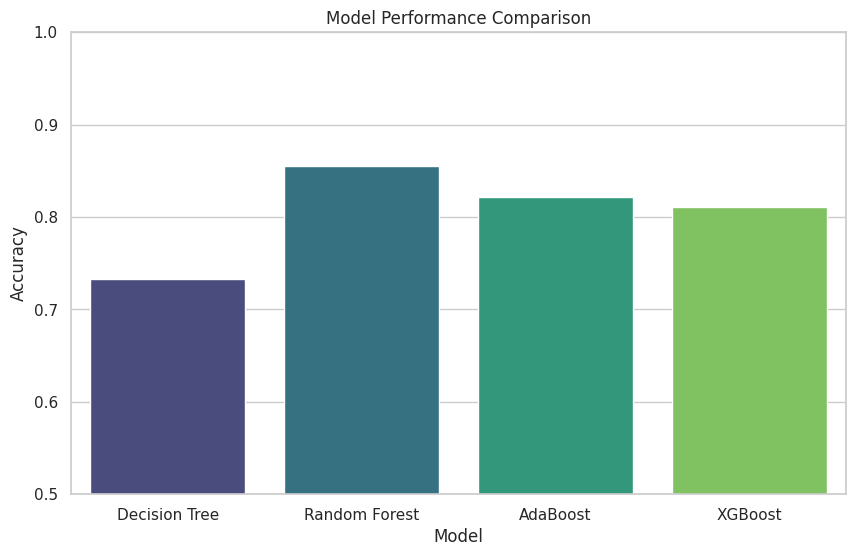

In [ ]:
# 🔹 Step 1: Import Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import urllib.request


# 🔹 Step 2: Load and Prepare Data


# Load the Heart Disease dataset directly from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
col_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
df = pd.read_csv(url, header=None, names=col_names, na_values="?")

# Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Handle missing values by dropping rows with NaN values
df.dropna(inplace=True)

# Features and target variable
X = df.drop(columns=["target"])
y = df["target"]

# Binarize the target variable: 0 (no disease) and 1 (disease)
y = y.apply(lambda x: 1 if x > 0 else 0)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# 🔹 Step 3: Decision Tree Classifier


# Initialize and train a Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


# 🔹 Step 4: Random Forest Classifier


# Initialize and train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


# 🔹 Step 5: AdaBoost Classifier


# Initialize and train an AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)

# Predictions
y_pred_ada = ada.predict(X_test)

# Evaluation
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))


# 🔹 Step 6: XGBoost Classifier


# XGBoost Classifier without deprecated parameter
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


# 🔹 Step 7: Comparing Models


# Model names and their corresponding accuracies
models = ["Decision Tree", "Random Forest", "AdaBoost", "XGBoost"]
accuracies = [
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_ada),
    accuracy_score(y_test, y_pred_xgb)
]

# Updated Seaborn bar plot to avoid FutureWarning
plt.figure(figsize=(10,6))
sns.barplot(x=models, y=accuracies, hue=models, dodge=False, palette="viridis", legend=False)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0.5, 1.0)
plt.show()



🎯 Final Takeaway: Random Forest was the best because it prevented overfitting, generalized better, and improved recall on heart disease cases!

